# TP1 Un premier exemple d'apprentissage


### Table of Contents

* [1. Par régression linéaire](#chapter1)
* [2. Par régression polynomiale](#chapter2)
   * [2.1 `PolynomialFeatures` pour les features de dimension 2](#section2_1)

Dans les exercices suivants, les données que l'on va étudier sont 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
size=100
x = np.sort(np.random.uniform(-5, 5, size))
X = x.reshape(-1, 1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 2, size)

**Exercice 1** : Exécuter la prochaine cellule. Constater la forme de données. 

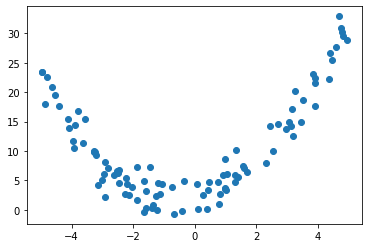

In [3]:
plt.scatter(x, y)
plt.show()

Le but des prochains exercices est d'*apprendre* une relation entre $X$ et $y$, c-à-d de chercher un modèle $\hat{f}$ telle que $\hat{y}:=\hat{f}(X)$ soit proche de $y$ au sens de la perte quadratique.

**Exercice 1** : 
1. Quelle variable est le *feature/input/covariable*? 
2. Quelle variable est la *variable dépendante/label/outcome/target*? 
3. Quelle est la dimension de $X$? Quelle est la taille de l'échantillon? 


In [4]:
y.shape

(100,)

Réponse pour exercice 1 :

1. La variable input est x

2. La variable target est y

3. La dimension de X est 100 x 1. La taille de l'échantillon est de 100


## 1. Exemple d'apprentissage par régression linéaire <a class="anchor" id="chapter1"></a>



On va d'abord utiliser la régression linéaire pour modéliser la relation entre $X$ et $y$. On va donc chercher $a$ et $b$ telle que $\hat{f}(x)=a\cdot x+b$ soit proche de $y$ au sens de perte quadratique.

On va utliser le package `sklearn.linear_model.LinearRegression`. 

(Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) <-- Lisez bien l'exemple de cette page

**Exercice 2** : Définir un modèle de régression linéaire, nommé par `lin_reg`.

In [5]:
# Réponse pour l'exercice 2
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()



**Exercice 3** : Entraîner le modèle de régression linéaire `lin_reg` sur $X$, y. Si l'apprentissage est réussie, `lin_reg` stockera le modèle.

In [6]:
# Réponse pour l'exercice 3
lin_reg = lin_reg.fit(X,y)


**Exercice 4** : 

(1) Tracer le modèle linéaire qu'on a entraîné. Hint: on pourra utliser `lin_reg.predict`. 

(2) Prédire la valeur de $y$ pour un nouveau x=1 en utilisant le modèle `lin_reg`.

[11.78134477]


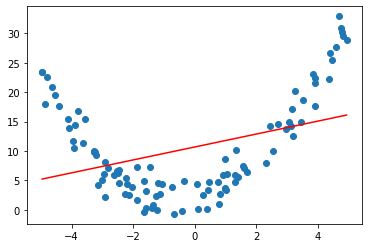

In [7]:
# Réponse pour l'exercice 4
plt.scatter(x,y)
plt.plot(X, lin_reg.predict(X), color='r')

print(lin_reg.predict(np.array([[1]])))




**Exercice 5** : Quels sont les coefficient $a$ et $b$ obtenus par `lin_reg`? 

In [8]:
# Réponse pour l'exercice 5
print("a = ", lin_reg.coef_)
print("L'intercept vaut : ", lin_reg.intercept_)







a =  [1.10192995]
L'intercept vaut :  10.679414827201473


**Exercice 6** : Calculer l'erreur quadratique de `lin_reg` sur les données. Celle-ci est fournie par $e=\sum_{i=1}^{100}(y_i-\hat{y}_i)^2$.

In [9]:
# Réponse pour l'exercice 6
y_hat = lin_reg.predict(X)
e = ((y - y_hat)**2).sum()
print(e)





6221.496999209761


**Exercice 7** : Décrire le fonctionnement de la prochaine ligne. Indice: chercher sur la page  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

In [10]:
lin_reg.score(X, y)
#Retourne le R^2


0.14035106571720624

 Réponse pour l'exercice 7:
 
 
 
 
 
 
 
 
 

 

**Exercice 8** : Quel est le fonctionnement de `X = x.reshape(-1, 1)`? Dans quelles conditions va-t'on utiliser $-1$ dans reshape? Si on entraîne le modèle sans passer par cette étape, que va-t'il se passer? Essayons `lin_reg.fit(x,y)` .


In [11]:
lin_reg.fit(x,y)

# Réponse pour l'exercice 8









ValueError: Expected 2D array, got 1D array instead:
array=[-4.95281144 -4.94311493 -4.84745029 -4.79560868 -4.63523943 -4.55137718
 -4.40058011 -4.11539827 -4.07944397 -3.94852315 -3.9162311  -3.89212099
 -3.78430879 -3.6329341  -3.57399686 -3.28058987 -3.26391998 -3.24589546
 -3.2191901  -3.1467178  -2.99876393 -2.95654723 -2.90797878 -2.89973422
 -2.80302507 -2.62305791 -2.53464119 -2.49304771 -2.47573647 -2.45742482
 -2.25926253 -2.23234939 -2.21630615 -2.1410431  -2.03206249 -1.87359702
 -1.86933558 -1.64403558 -1.6388805  -1.59809785 -1.59614777 -1.45204388
 -1.40492156 -1.36811996 -1.27167954 -1.23747546 -1.18056555 -1.1223372
 -1.04964068 -0.75482409 -0.68295816 -0.4302087  -0.36501981  0.0543143
  0.08698893  0.28035223  0.40404575  0.43404942  0.44684878  0.75093329
  0.76901499  0.81842192  0.92805401  0.97973684  0.98843377  0.98858946
  1.02296658  1.03804539  1.29941876  1.30183936  1.34036683  1.41101259
  1.57624806  1.5894007   1.70749085  2.31300753  2.42479689  2.54348995
  2.69115171  2.95662508  3.05450537  3.11683149  3.16224749  3.17649379
  3.25852755  3.44776132  3.52395088  3.84853293  3.90411563  3.90545945
  3.91321954  4.33841299  4.4002982   4.46379881  4.570126    4.66609694
  4.75006494  4.78623785  4.80920857  4.92158037].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 2. Exemple d'apprentissage par régression polynomiale <a class="anchor" id="chapter2"></a>


Maintenant passons à la régression polynomiale de degré 2 pour modéliser la relation entre $X$ et $y$. Ici, on cherche donc $a$, $b$ et $c$ telle que $\hat{f}(x)=a\cdot x^{2}+b\cdot x +c$ soit proche de $y$ au sens de perte quadratique.

On va donc ajouter un feature/une covariable $x^2$ puis faire la régression linéaire sur la nouvelle covariable $X=(x^2, x)$

**Exercice 9** : Créer une nouvelle matrice `X2` de dimension 100$\times$2 donc la première colonne est $x^2$, la deuxème colonne est $x$.

In [12]:
# Réponse pour l'exercice 9
x2 = x**2
X2 = np.hstack([X**2, X])


**Exercice 10** : Entraîner un nouveau modèle, nommé `poly2_reg`, pour la régression linéaire entre `X2` et `y` (qui est donc la régression polynomiale de degré 2 entre `X` et `y`).

In [13]:
# Réponse pour l'exercice 10
poly2_reg = LinearRegression()
poly2_reg = poly2_reg.fit(X2, y)





**Exercice 11** : 

(1) Tracer `poly2_reg` le modèle polynomiale de degré 2 qu'on a entraîné. Indice: on pourra utliser `poly2_reg.predict`. 

(2) Prédire la valeur de $y$ pour un nouveau x=1 en utilisant le modèle `poly2_reg`.

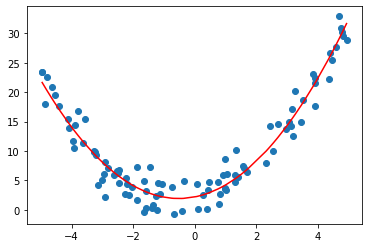

La valeur de y pour x=1 est [4.23275361]


In [14]:
# Réponse pour l'exercice 11

plt.scatter(x, y)

#ajouter votre code ici
plt.plot(X, poly2_reg.predict(X2), color='r')


plt.show()
y1 = np.array([1,1])
print("La valeur de y pour x=1 est", poly2_reg.predict(np.array([[1,1]]))) #ajouter votre code ici, attention l'input doit contenir 1^2=1 et aussi 1)

       

**Exercice 12** : Quels sont les coefficients $a$, $b$, $c$ dans $\hat{f}(x)=a\cdot x^{2}+b\cdot x +c$?

In [15]:
# Réponse pour l'exercice 12
a,b = poly2_reg.coef_
print("La valeur de a est : ", a)
print("La valeur de b est : ", b)
print("La valeur de c est : ", poly2_reg.intercept_)




La valeur de a est :  1.0048091317822476
La valeur de b est :  1.0461889346692972
La valeur de c est :  2.18175554289782


**Exercice 13** : Calculez l'erreur quadratique de `poly2_reg` sur les données. Comparez avec l'erreur de `lin_reg` de l'exercice 6.

In [16]:
# Réponse pour l'exercice 13
y_hat = poly2_reg.predict(X2)
e = ((y - y_hat)**2).sum()
print(e)

462.8847596301938


Le passage $X\rightarrow [X^2, X]$ peut également être réalisé par `sklearn.preprocessing.PolynomialFeatures`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

(Attention à l'ordre de `PolynomialFeatures` : $X\rightarrow [1, X, X^2]$ )

**Exercice 13** : Lire attentivement le code de la cellule suivante, puis s'en inspirer pour écrire un modèle de régression polynomiale de degré 20. 

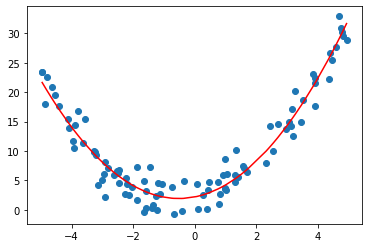

[0.         1.04618893 1.00480913] 2.181755542897813
Les coefficients obtenus sont a= 0.0 , b= 1.0461889346692976 and c= 2.181755542897813


In [17]:
# Procédure de X--> [1, X, X^2] par PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)    
poly2.fit(X) 
X2_bis = poly2.transform(X) #Contient [1,X,X^2]


# Entraître le modèle de regression sur X2_bis et y
poly2_bis_reg = LinearRegression()
poly2_bis_reg.fit(X2_bis, y)

# Tracer le modèle poly2_bis_reg
plt.scatter(x, y)
plt.plot(x, poly2_bis_reg.predict(X2_bis), color='r')
plt.show()

# Montrer les coefficient qu'on a trouvé (Attention à l'ordre de coefficient)
print (poly2_bis_reg.coef_, poly2_bis_reg.intercept_)
print ("Les coefficients obtenus sont a=",poly2_bis_reg.coef_[2],", b=",poly2_bis_reg.coef_[1],"and c=", poly2_bis_reg.intercept_ )




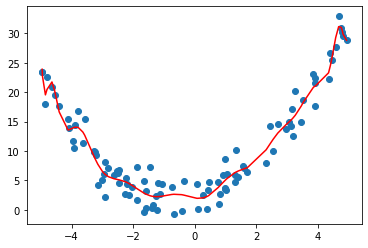

[ 0.00000000e+00 -9.79589223e-01  2.66160450e+00  4.44446757e+00
 -1.18713038e+00 -2.80972923e+00  2.38879910e-01  8.24506395e-01
  2.01576907e-02 -1.31915538e-01 -1.50426943e-02  1.24350381e-02
  2.49173382e-03 -7.10453586e-04 -2.05705858e-04  2.41914496e-05
  9.28659623e-06 -4.51663675e-07 -2.18806409e-07  3.55813565e-09
  2.10614862e-09] 2.0041298315907436


In [18]:
# Réponse pour l'exercice 13
# Procédure de X--> [1, X, X^2] par PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=20)    
poly2.fit(X) 
X2_bis = poly2.transform(X) #Contient [1,X,X^2]


# Entraître le modèle de regression sur X2_bis et y
poly2_bis_reg = LinearRegression()
poly2_bis_reg.fit(X2_bis, y)

# Tracer le modèle poly2_bis_reg
plt.scatter(x, y)
plt.plot(x, poly2_bis_reg.predict(X2_bis), color='r')
plt.show()

# Montrer les coefficient qu'on a trouvé (Attention à l'ordre de coefficient)
print (poly2_bis_reg.coef_, poly2_bis_reg.intercept_)













### 2.1 `PolynomialFeatures` pour les features de dimension 2<a class="anchor" id="section2_1"></a>

Dans cette partie, on va s'intéresser au résultat de `PolynomialFeatures` pour un input $X=(x_1,x_2)$ de dimension 2.


**Exercice 14** : En utilisant le code suivant et ses résultats, donner, pour un input $X=(x_1,x_2)$, la valeur de l'output de `PolynomialFeatures(2)` et `PolynomialFeatures(2, interaction_only=True)`.

In [19]:
XX = np.arange(6).reshape(3, 2)
print (XX)

[[0 1]
 [2 3]
 [4 5]]


In [20]:
poly2 = PolynomialFeatures(2)
poly2.fit_transform(XX)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [21]:
poly2_bis = PolynomialFeatures(2, interaction_only=True)
poly2_bis.fit_transform(XX)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

 Réponse pour l'exercice 14
 
 
 
 
 
 
 
 